# Análise de Avatar: The Last Airbender

In [1]:
#Importando os Pacotes
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
#Carregando os dados
#Se quiser aparecer o texto inteiro
#pd.set_option("display.max_colwidth", -1)
avatar = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-08-11/avatar.csv")

In [3]:
avatar.head(2)


,id,book,book_num,chapter,chapter_num,character,full_text,character_words,writer,director,imdb_rating
0,1,Water,1,The Boy in the Iceberg,1,Katara,Water. Earth. Fire. Air. My grandmother used t...,Water. Earth. Fire. Air. My grandmother used t...,"‎Michael Dante DiMartino, Bryan Konietzko, Aar...",Dave Filoni,8.1
1,2,Water,1,The Boy in the Iceberg,1,Scene Description,"As the title card fades, the scene opens onto ...",NaN,"‎Michael Dante DiMartino, Bryan Konietzko, Aar...",Dave Filoni,8.1


In [4]:
#!pip install dataframe_image
import dataframe_image as dfi

## Análise dos dados

### Quais os personagens com mais falas durante o programa?

In [5]:
#Quais os personagens com mais falas durante o programa
falas_personagens = avatar[avatar['character'] != 'Scene Description']\
    [['character','full_text']].\
    groupby("character").\
    count().\
    sort_values(by = 'full_text',ascending=False).\
    head(5).\
    reset_index().\
    rename(columns={'full_text':'Número de falas','character' : 'Personagem'})

dfi.export(falas_personagens,"falas_personagens.png")

### Episódios favoritos pela crítica

In [6]:
#episódios favoritos do público
ep_favoritos = avatar[['chapter','book_num',"chapter_num",'imdb_rating']].drop_duplicates().\
    sort_values('imdb_rating',ascending = False).\
    head(10).\
    rename(columns={'chapter':'Nome',
                    'imdb_rating' : 'Nota IMDB',
                    'book_num': 'Livro',
                    'chapter_num':'Episódio'})

dfi.export(ep_favoritos,"ep_favoritos.png")

### Episódios em que a palavra "repolho" é dita

In [7]:
#Criando variável referente ao livro e episódio junto
avatar['book_chapter'] = avatar.apply(lambda x: '.'.join([str(x['book_num']),str(x['chapter_num'])]),axis=1)

#Criando a variável refente se há a citação da palavra repolho na fala
avatar = avatar.assign(repolho = lambda x: (x['full_text'].str.contains("Cabbage ")| x['full_text'].str.contains(" cabbage "))) 

#Vendo em quais episódios há a citação da palavra repolho
falas_repolho = avatar[avatar['repolho']]['book_chapter'].drop_duplicates()

#pegando o index dos episódios em que se fala repolho
index_cabbage = avatar[avatar['book_chapter'].isin(falas_repolho)]['repolho'].index

#Adicionando 1 para todo episódio que há a citação da palavra repolho
avatar['repolho'].loc[index_cabbage] = index_cabbage/index_cabbage

#Transformando em numerico
avatar['repolho'] = pd.to_numeric(avatar['repolho'])

C:\Users\Windows 10\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [8]:
index_cabbage

Int64Index([  982,   983,   984,   985,   986,   987,   988,   989,   990,
              991,
            ...
            12735, 12736, 12737, 12738, 12739, 12740, 12741, 12742, 12743,
            12744],
           dtype='int64', length=1512)

<ipython-input-9-4212a6d749a4>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(['0','1','2','3'])


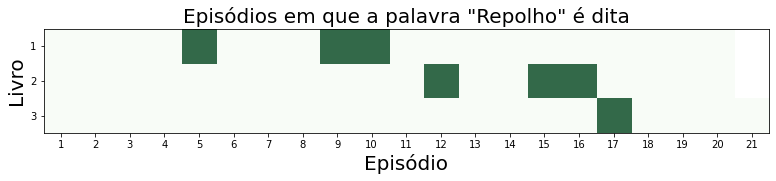

In [9]:
#gráfico dos repolhos
#transforma em matrix onde os livros são as linhas e os episódios, as colunas
cabbage_matrix = avatar.pivot_table('repolho',['book_num'],'chapter_num')
fig,axis = plt.subplots(figsize=(13,3),sharex=True)
plt.imshow(cabbage_matrix, alpha=0.8, cmap='Greens')
plt.xlabel('Episódio', size = 20)
plt.ylabel('Livro', size = 20)
plt.title('Episódios em que a palavra "Repolho" é dita', size = 20)
plt.xticks(range(0,21))
axis.set_yticklabels(['0','1','2','3'])
axis.set_xticklabels(range(1,22))
#salva o gráfico
plt.savefig('cabbage_avatar.png')

### Episódios em que a palavra "chá" é dita

In [10]:
#Criando a variável refente se há a citação da palavra repolho na fala
avatar = avatar.assign(tea = lambda x: (x['full_text'].str.contains("Tea ") | x['full_text'].str.contains(" tea "))) 

#Vendo em quais episódios há a citação da palavra repolho
falas_tea = avatar[avatar['tea']]['book_chapter'].drop_duplicates()

#pegando o index dos episódios em que se fala repolho
index_tea = avatar[avatar['book_chapter'].isin(falas_tea)]['tea'].index

#Adicionando 1 para todo episódio que há a citação da palavra repolho
#avatar['tea'].iloc[index_tea] = index_tea/index_tea
avatar['tea'].iloc._setitem_with_indexer(index_tea, index_tea/index_tea)

#Transformando em numerico
avatar['tea'] = pd.to_numeric(avatar['tea'])

<ipython-input-10-e44cf24239c4>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avatar['tea'].iloc._setitem_with_indexer(index_tea, index_tea/index_tea)


In [11]:
index_tea

Int64Index([  405,   406,   407,   408,   409,   410,   411,   412,   413,
              414,
            ...
            13375, 13376, 13377, 13378, 13379, 13380, 13381, 13382, 13383,
            13384],
           dtype='int64', length=5216)

<ipython-input-12-8a70f01c61b7>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(['0','1','2','3'])


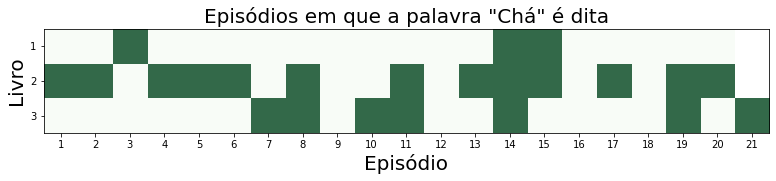

In [12]:
#gráfico chá
#transforma em matrix onde os livros são as linhas e os episódios, as colunas
tea_matrix = avatar.pivot_table('tea',['book_num'],'chapter_num')
fig,axis = plt.subplots(figsize=(13,3),sharex=True)
plt.imshow(tea_matrix, alpha=0.8, cmap='Greens')
plt.xlabel('Episódio', size = 20)
plt.ylabel('Livro', size = 20)
plt.title('Episódios em que a palavra "Chá" é dita', size = 20)
plt.xticks(range(0,21))
axis.set_yticklabels(['0','1','2','3'])
axis.set_xticklabels(range(1,22))
#salva o gráfico
plt.savefig('tea_avatar.png')

In [13]:
avatar[['book_num','tea']].\
    groupby('book_num').mean().\
    round(2).\
    reset_index().\
    rename(columns={'imdb_rating':'Nota IMDB','tea' : 'perc Chá dita'})

,book_num,perc Chá dita
0,1,0.19
1,2,0.68
2,3,0.31


### Avaliação do episódio pelo IMDB

<ipython-input-14-a008edae59fe>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(['0','1','2','3'])


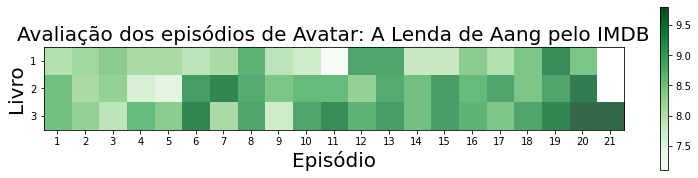

In [14]:
#gráfico da avaliação do episódio
avatar['imdb_rating'] = avatar['imdb_rating'] .fillna(avatar['imdb_rating'].mean())
a = avatar.pivot_table('imdb_rating',['book_num'],'chapter_num')
fig,axis = plt.subplots(figsize=(13,3),sharex=True)
plt.imshow(a, alpha=0.8, cmap='Greens')
plt.xlabel('Episódio', size = 20)
plt.ylabel('Livro', size = 20)
plt.title('Avaliação dos episódios de Avatar: A Lenda de Aang pelo IMDB', size = 20)
plt.xticks(range(0,21))
plt.colorbar()
axis.set_yticklabels(['0','1','2','3'])
axis.set_xticklabels(range(1,22))
plt.savefig('imdb_avatar.png')

In [15]:
#Nota média dos episódios por livro
nota_livro = avatar[['book_num','imdb_rating']].\
    groupby('book_num').mean().\
    round(2).\
    reset_index().\
    rename(columns={'imdb_rating':'Nota média IMDB','book_num' : 'Livro'})

dfi.export(nota_livro,"nota_livro.png")

In [16]:
scene = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-08-11/scene_description.csv")

In [17]:
scene[scene.assign(bend = lambda x: (x['scene_description'].str.contains("Bending ")\
                                     | x['scene_description'].str.contains("bending")\
                                     | x['scene_description'].str.contains("Bend ")\
                                     | x['scene_description'].str.contains("bend")))['bend']]

,id,scene_description
10,21,"[He waves his hands, mockingly imitating water..."
33,49,"[He looks at the tile in his hand, depicting t..."
34,49,[He places it on a tile carrying the symbol of...
65,84,[Aang airbends himself onto Appa.]
133,178,"[He jumps at a penguin, but the animal evades ..."
...,...,...
7417,13045,[Kyoshi enters the Avatar State briefly and be...
7418,13045,[Cut to side-view of Kyoshi as she uses airben...
7431,13053,[Zooms in on the firebender.]
7578,13299,"[She moves Sokka out of the way, spits into he..."
